In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import regularizers, optimizers
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from keras import layers
from keras.optimizers.experimental import  SGD
from keras.utils import plot_model
import networkx as nx

import warnings
warnings.filterwarnings('ignore')

2023-12-18 23:28:43.550337: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-18 23:28:43.596199: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-18 23:28:43.596256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-18 23:28:43.599445: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-18 23:28:43.608363: I tensorflow/core/platform/cpu_feature_guar

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3713871012967429366
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5866782720
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7851918566509960990
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-12-18 23:28:49.929923: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-18 23:28:49.967593: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-18 23:28:49.967638: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-18 23:28:50.930683: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-18 23:28:50.930814: I external/local_xla/xla/stream_executor

In [8]:
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

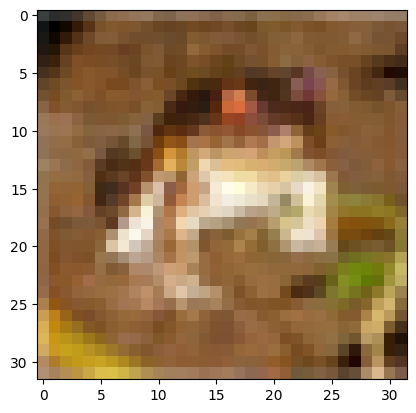

In [3]:
plt.imshow(X_train[0])
images = []

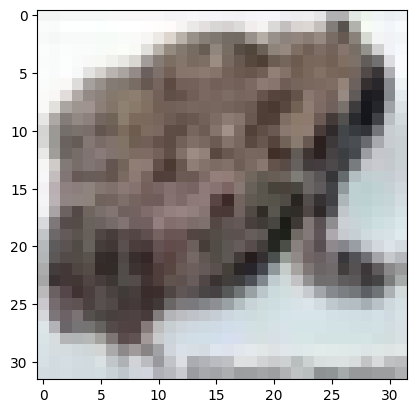

In [126]:
plt.imshow(X_train[np.random.randint(0, 1000)])

Frog extraction

In [7]:
inds = Y_train.flatten() == 6
frogs = X_train[inds, :]
# for i in range(10, 20):
#     plt.imshow(frogs[i])
#     plt.show()

In [9]:
# Normalizing
X_train = X_train/255
X_test = X_test/255
# One-Hot-Encoding
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)

Dense
Dense
Dense
Dense
Flatten
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
MaxPooling2D
Conv2D
Conv2D
InputLayer


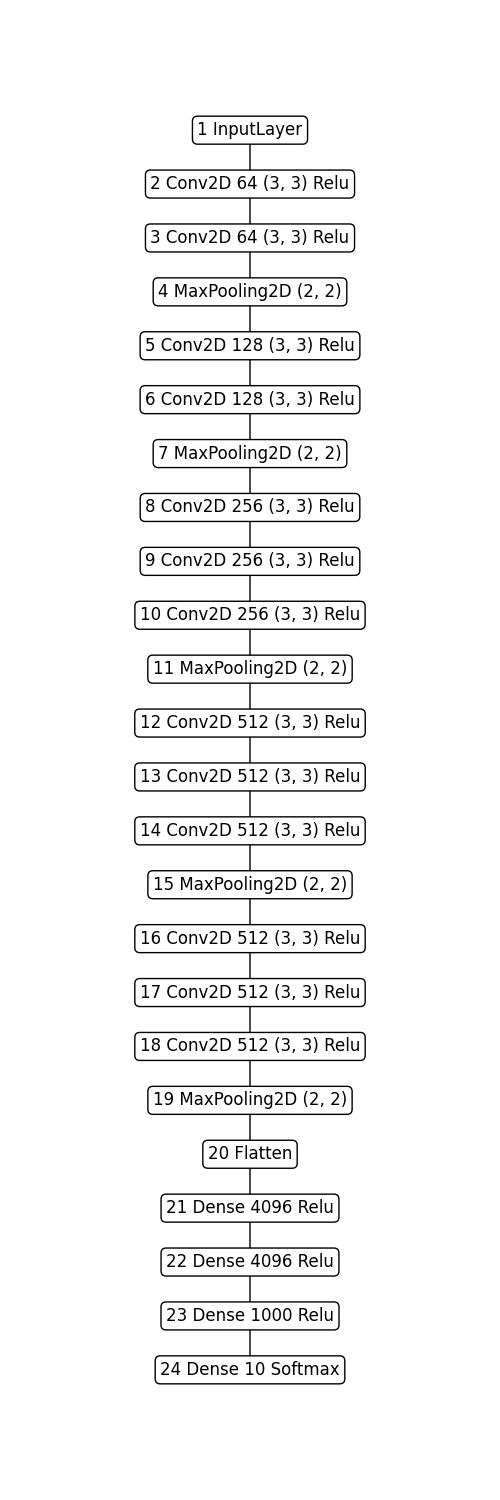

In [119]:
# Model visualization
import itertools
from PIL import Image as im
from IPython.display import Image
import matplotlib

def plot_keras_model(model, filename):
    plt.ioff() # Turn off interactive mode
    G = nx.DiGraph()
    n = len(model.layers)
    for i, layer in enumerate(model.layers[::-1]):
        layer_type = layer.__class__.__name__
        layer_act = f" {layer.activation.__name__.capitalize()}" if hasattr(layer, 'activation') else ''
        print(layer_type)
        if isinstance(layer, Conv2D):
            G.add_node(f"{n-i} {layer_type} {layer.filters} {layer.kernel_size}{layer_act}", subset=i)
        elif isinstance(layer, Dense):
            G.add_node(f"{n-i} {layer_type} {layer.units}{layer_act}", subset=i)
        elif isinstance(layer, MaxPooling2D):
            G.add_node(f"{n-i} {layer_type} {layer.pool_size}{layer_act}", subset=i)
        else:
            G.add_node(f"{n-i} {layer_type}{layer_act}", subset=i)
    for layer1, layer2 in nx.utils.pairwise(G.nodes):
        G.add_edge(layer1, layer2)
    color_map = []
    for i, node in enumerate(G):
        if model.layers[i].__class__.__name__ == "Conv2D":
            color_map.append('tab:blue')
        else: 
            color_map.append('tab:green')
    pos = nx.multipartite_layout(G, subset_key="subset", align="horizontal")
    plt.figure(figsize=(5, 15))
    nx.draw(G, pos, node_color="w", with_labels=True, edge_color="black", node_size=25000,
            arrowsize=20, edgecolors="g", node_shape="", font_weight="normal",
            bbox=dict(facecolor="w", edgecolor='black', boxstyle='round,pad=0.3'))
    plt.axis("equal")
    # plt.show()
    plt.savefig(filename, transparent=True)
    plt.ion()
filename = "VGG16 arch"
plot_keras_model(model, filename)
Image(filename + ".png")

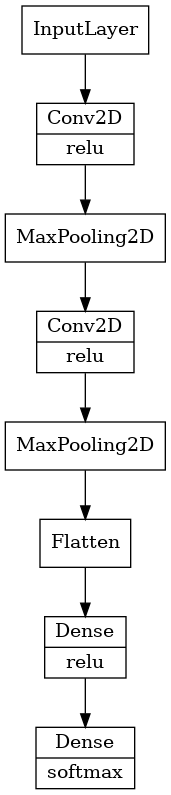

In [111]:
# Base Model - Approximately Le Net-5
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ="relu"))
model.add(Dense(10, activation ="softmax"))

optimizer = SGD(0.01)
model.compile(loss ="categorical_crossentropy", optimizer=optimizer, metrics =["accuracy"])
plot_model(model, show_layer_names=False, show_layer_activations=True)

In [10]:
history = model.fit(X_train, Y_train_en, batch_size=100, epochs = 1000, verbose=1,validation_data=(X_test,Y_test_en))

Epoch 1/1000


2023-12-16 20:56:16.780669: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2023-12-16 20:56:17.075701: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6458175700 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-16 20:56:17.075741: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
I0000 00:00:1702778177.124559   25804 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 [==============================] - 6s 7ms/step - loss: 2.2061 - accuracy: 0.2001 - val_loss: 2.0409 - val_accuracy: 0.2642
Epoch 2/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.9440 - accuracy: 0.3015 - val_loss: 1.8452 - val_accuracy: 0.3530
Epoch 3/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.8006 - accuracy: 0.3585 - val_loss: 1.7546 - val_accuracy: 0.3704
Epoch 4/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.6829 - accuracy: 0.4013 - val_loss: 1.6069 - val_accuracy: 0.4285
Epoch 5/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.5899 - accuracy: 0.4320 - val_loss: 1.5627 - val_accuracy: 0.4456
Epoch 6/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.5258 - accuracy: 0.4548 - val_loss: 1.5600 - val_accuracy: 0.4506
Epoch 7/1000
500/500 [==============================] - 3s 6ms/step - loss: 1.4745 - accuracy: 0.4754 - val_loss: 1.4677 - val_accuracy: 0.4754
Epoch

In [11]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(1172.4281045751634, 0.5, 'Error')

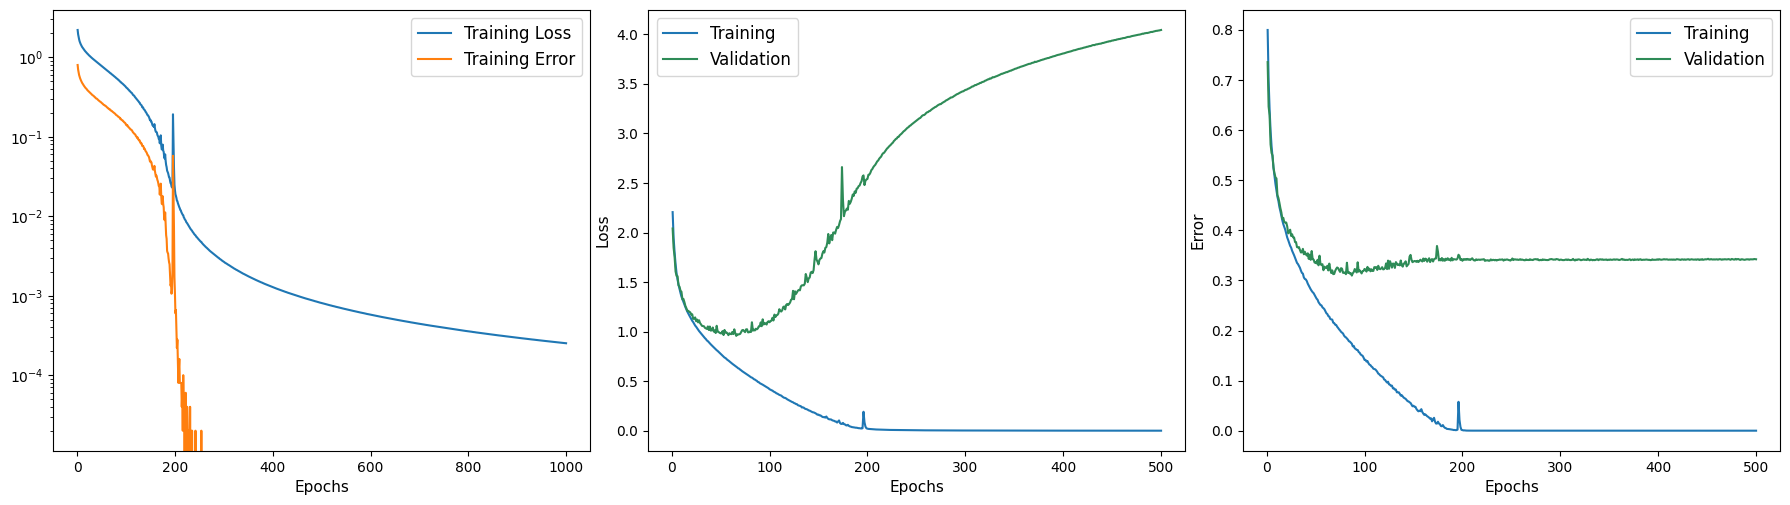

In [102]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18, 5))
acc, val_acc = np.array(h["accuracy"]), np.array(h["val_accuracy"])
# h = history.history
epochs = list(range(1, len(h["loss"]) + 1))
fig.tight_layout()
ax0.set_yscale("log")
ax0.plot(epochs, h["loss"], label="Training Loss")
ax0.plot(epochs, 1 - acc, label="Training Error")
ax0.legend(loc="upper right", fontsize=12)
ax0.set_xlabel("Epochs", fontsize=11)
ax1.set_ylabel("Loss", fontsize=11)
ax1.plot(epochs[:500], h["loss"][:500], label="Training")
ax1.plot(epochs[:500], h["val_loss"][:500], label="Validation", color='seagreen')
ax1.legend(loc="upper left", fontsize=12)
ax1.set_xlabel("Epochs", fontsize=11)
ax2.plot(epochs[:500], 1 - acc[:500], label="Training")
ax2.plot(epochs[:500], 1 - val_acc[:500], label="Validation", color='seagreen')
ax2.legend(loc="upper right", fontsize=12)
ax2.set_xlabel("Epochs", fontsize=11)
ax2.set_ylabel("Error", fontsize=11)

After epoch 253 all training examples are correctly classified

In [24]:
import pickle as cPickle
with open(r"AlexNet_50_epochs.pickle", "wb") as output_file:
    cPickle.dump(history.history, output_file)

In [90]:
with open(r"1000_history.pickle", "rb") as input_file:
    h = cPickle.load(input_file)

In [ ]:
n = len(h["loss"])
epochs_last = np.arange(n-9, n+1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11, 5))
ax1.plot(epochs_last, h["loss"][n-10:], label="loss")
ax1.legend(loc="upper left")
ax2.plot(epochs_last, h["accuracy"][n-10:], label="accuracy")
ax2.legend(loc="upper left")

AlexNet

In [109]:
model = keras.models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_4 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 lambda_4 (Lambda)           (None, 56, 56, 96)        0         
                                                                 
 activation_10 (Activation)  (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 27, 27, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 7, 7, 256)         614656    
                                                      

In [ ]:
optimizer = SGD(0.01)
model.compile(loss ="categorical_crossentropy", optimizer=optimizer, metrics =["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train_en, batch_size=100, epochs = 150, verbose=1,validation_data=(X_test,Y_test_en))

In [26]:
h6 = dict(loss = [], val_loss = [], accuracy = [], val_accuracy = [])
file1 = open('outputVGG.txt', 'r')
for line in file1:
    line = line[:-1]
    if not line.startswith("Epoch"):
        first_split = line[59:].split(" - ")
        for s in first_split:
            [label, value] = s.split(": ")
            h6[label].append(float(value))
            

In [82]:
h5 = dict(loss = [], val_loss = [], accuracy = [], val_accuracy = [])
for i, label in enumerate(h3.keys()):
    h5[label] = h4[label] + h3[label]

Text(1172.4281045751634, 0.5, 'Error')

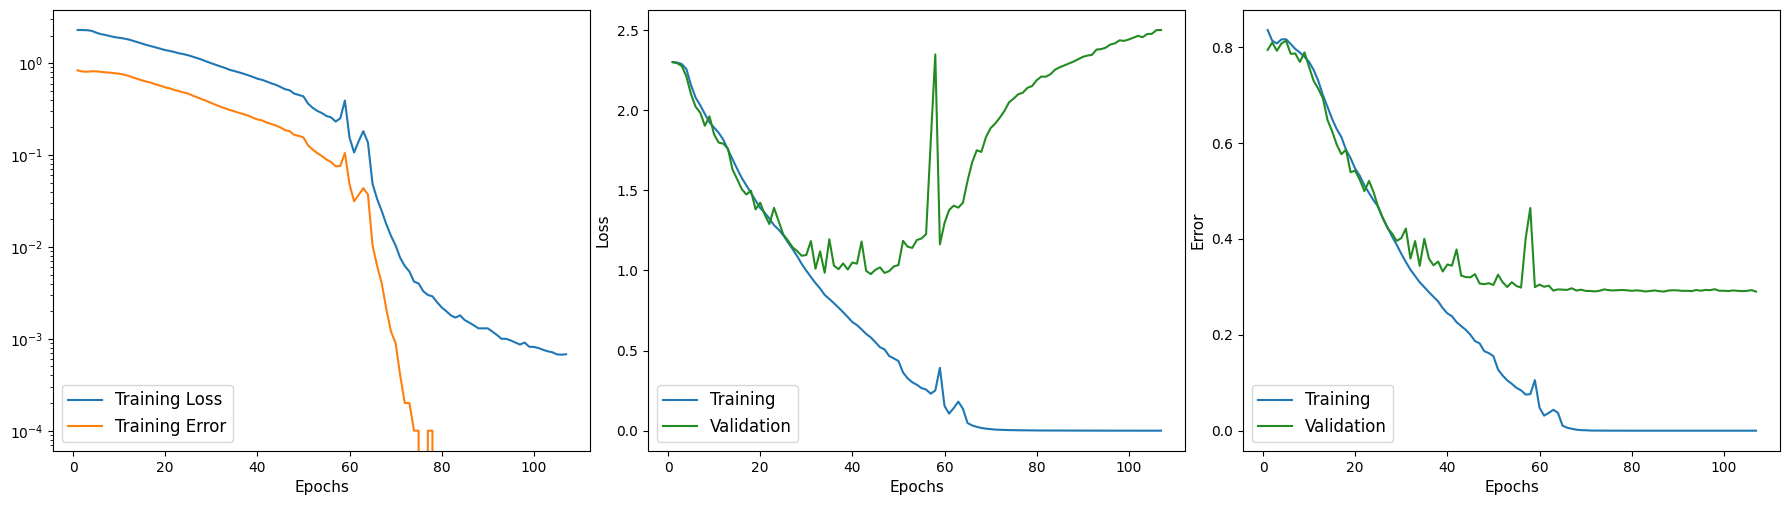

In [104]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
acc, val_acc = np.array(h5["accuracy"]), np.array(h5["val_accuracy"])
h = history.history
epochs = list(range(1, len(h5["loss"]) + 1))
fig.tight_layout()
ax0.set_yscale("log")
ax0.plot(epochs, h5["loss"], label="Training Loss")
ax0.plot(epochs, 1 - acc, label="Training Error")
ax0.legend(loc="lower left", fontsize=12)
ax0.set_xlabel("Epochs", fontsize=11)
# ax0.set_ylabel("Loss", fontsize=11)
ax1.set_ylabel("Loss", fontsize=11)
ax1.plot(epochs, h5["loss"], label="Training")
ax1.plot(epochs, h5["val_loss"], label="Validation", color='forestgreen')
ax1.legend(loc="lower left", fontsize=12)
ax1.set_xlabel("Epochs", fontsize=11)
ax2.plot(epochs, 1 - acc, label="Training")
ax2.plot(epochs, 1 - val_acc, label="Validation", color='forestgreen')
ax2.legend(loc="lower left", fontsize=12)
ax2.set_xlabel("Epochs", fontsize=11)
ax2.set_ylabel("Error", fontsize=11)

All training examples were classified correctly after 

In [48]:
for i, s in enumerate(h6["val_accuracy"]):
    print(f"epoch {i}: {s}")

epoch 0: 0.1
epoch 1: 0.1393
epoch 2: 0.1415
epoch 3: 0.1744
epoch 4: 0.1785
epoch 5: 0.1892
epoch 6: 0.1778
epoch 7: 0.2413
epoch 8: 0.2194
epoch 9: 0.2582
epoch 10: 0.2911
epoch 11: 0.317
epoch 12: 0.3268
epoch 13: 0.3639
epoch 14: 0.3928
epoch 15: 0.3942
epoch 16: 0.4256
epoch 17: 0.4371
epoch 18: 0.4346
epoch 19: 0.4843
epoch 20: 0.4906
epoch 21: 0.535
epoch 22: 0.5221
epoch 23: 0.5317
epoch 24: 0.5653
epoch 25: 0.5802
epoch 26: 0.5905
epoch 27: 0.5806
epoch 28: 0.6317
epoch 29: 0.6528
epoch 30: 0.6272
epoch 31: 0.6571
epoch 32: 0.661
epoch 33: 0.6462
epoch 34: 0.6865
epoch 35: 0.6832
epoch 36: 0.6932
epoch 37: 0.704
epoch 38: 0.6943
epoch 39: 0.6705
epoch 40: 0.7025
epoch 41: 0.7041
epoch 42: 0.6966
epoch 43: 0.6785
epoch 44: 0.7149
epoch 45: 0.685
epoch 46: 0.6955
epoch 47: 0.7138
epoch 48: 0.692
epoch 49: 0.7091
epoch 50: 0.7097
epoch 51: 0.6996
epoch 52: 0.7079
epoch 53: 0.7185
epoch 54: 0.7144
epoch 55: 0.7182
epoch 56: 0.7276
epoch 57: 0.721
epoch 58: 0.7041
epoch 59: 0.7199


VGG16

In [116]:
from keras.layers import Input, Conv2D
from keras.layers import MaxPool2D, Flatten, Dense
from keras import Model
from keras import layers

In [117]:
input = Input(shape =(32,32,3))
# 1st Conv Block
x = layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:])(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 2nd Conv Block
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 3rd Conv block
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =256, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 4th Conv block
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# 5th Conv block
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = Conv2D (filters =512, kernel_size =3, padding ='same', activation='relu')(x)
x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
# Fully connected layers
x = Flatten()(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 4096, activation ='relu')(x)
x = Dense(units = 1000, activation ='relu')(x)
output = Dense(units = 10, activation ='softmax')(x)

model = Model (inputs=input, outputs =output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_53 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_54 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_56 (Conv2D)          (None, 16, 16, 128)       147584    
                                                           

In [11]:
optimizer = SGD(0.01)
model.compile(loss ="categorical_crossentropy", optimizer=optimizer, metrics =["accuracy"])

In [16]:
     

history = model.fit(X_train, Y_train_en, batch_size=100, epochs = 350, verbose=1,validation_data=(X_test,Y_test_en))

Epoch 1/350


2023-12-17 16:59:36.740639: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2023-12-17 16:59:38.263572: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fe25da6c630 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-17 16:59:38.263618: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
I0000 00:00:1702850378.342311     374 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


500/500 [==============================] - 38s 58ms/step - loss: 2.3025 - accuracy: 0.1032 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/350
500/500 [==============================] - 25s 51ms/step - loss: 2.3023 - accuracy: 0.1073 - val_loss: 2.3021 - val_accuracy: 0.1393
Epoch 3/350
500/500 [==============================] - 26s 51ms/step - loss: 2.3020 - accuracy: 0.1125 - val_loss: 2.3016 - val_accuracy: 0.1415
Epoch 4/350
500/500 [==============================] - 25s 51ms/step - loss: 2.3012 - accuracy: 0.1346 - val_loss: 2.3002 - val_accuracy: 0.1744
Epoch 5/350
500/500 [==============================] - 25s 51ms/step - loss: 2.2980 - accuracy: 0.1657 - val_loss: 2.2937 - val_accuracy: 0.1785
Epoch 6/350
500/500 [==============================] - 25s 51ms/step - loss: 2.2772 - accuracy: 0.1832 - val_loss: 2.2348 - val_accuracy: 0.1892
Epoch 7/350
500/500 [==============================] - 26s 51ms/step - loss: 2.1553 - accuracy: 0.1887 - val_loss: 2.1639 - val_accuracy: 0.17

KeyboardInterrupt: 

In [ ]:
model.save_weights('weights.h5')

Text(1172.4281045751634, 0.5, 'Error')

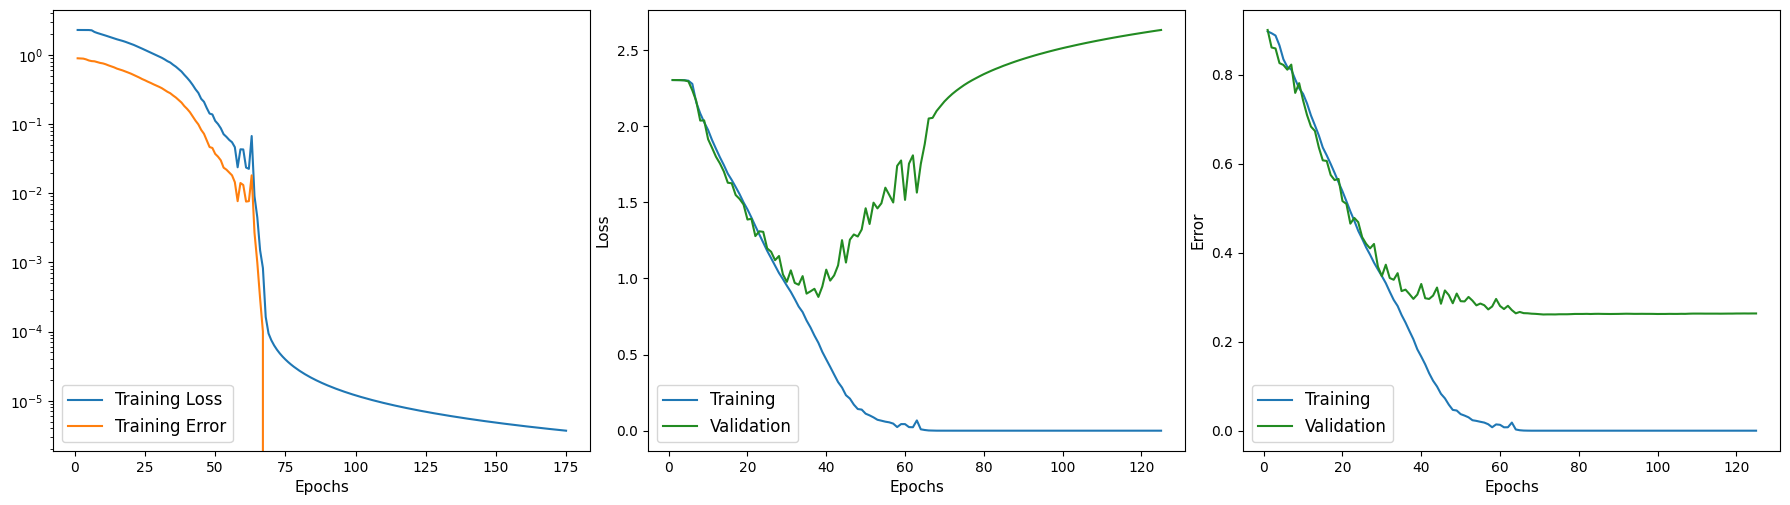

In [46]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize = (18, 5))
h = h6
n = 125
acc, val_acc = np.array(h["accuracy"]), np.array(h["val_accuracy"])
epochs = list(range(1, len(h["loss"]) + 1))
fig.tight_layout()
ax0.set_yscale("log")
ax0.plot(epochs, h["loss"], label="Training Loss")
ax0.plot(epochs, 1 - acc, label="Training Error")
ax0.legend(loc="lower left", fontsize=12)
ax0.set_xlabel("Epochs", fontsize=11)
# ax0.set_ylabel("Loss", fontsize=11)
ax1.set_ylabel("Loss", fontsize=11)
ax1.plot(epochs[:n], h["loss"][:n], label="Training")
ax1.plot(epochs[:n], h["val_loss"][:n], label="Validation", color='forestgreen')
ax1.legend(loc="lower left", fontsize=12)
ax1.set_xlabel("Epochs", fontsize=11)
ax2.plot(epochs[:n], 1 - acc[:n], label="Training")
ax2.plot(epochs[:n], 1 - val_acc[:n], label="Validation", color='forestgreen')
ax2.legend(loc="lower left", fontsize=12)
ax2.set_xlabel("Epochs", fontsize=11)
ax2.set_ylabel("Error", fontsize=11)

All examples are classified after 66 epochs, final validation accuracy of 73.5%